In [1]:
from __future__ import print_function, division
from sympy import *
import ast
import numpy as np
import matplotlib.pyplot as plt
#from brokenaxes import brokenaxes
#from numba import jit

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
name = "free_energy_def.dat"
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)

In [4]:
tmp

'def fed_eqn():\n     return sa2L3*(sa1L10*sn1 + sa1L11*sn2 + sa1L9*sn0)*(sa1L12*sn0 + sa1L13*sn1 + sa1L14*sn2) + sa2L4*(sa1L15*sn0 + sa1L16*sn1 + sa1L17*sn2)*(sa1L18*sn0 + sa1L19*sn1 + sa1L20*sn2) + sa2L5*(sa1L21*sn0 + sa1L22*sn1 + sa1L23*sn2)*(sa1L24*sn0 + sa1L25*sn1 + sa1L26*sn2) + sa2L6*(sa1L27*sn0 + sa1L28*sn1 + sa1L29*sn2)/(sa1L30*sn0 + sa1L31*sn1 + sa1L32*sn2 + 1) + (sa2L21*(sa1L0*sn0 + sa1L1*sn1 + sa1L2*sn2) + sa2L22*(exp(sa1L3*sn0 + sa1L4*sn1 + sa1L5*sn2) - 1) + sa2L23*log(sa1L6*sn0 + sa1L7*sn1 + sa1L8*sn2 + 1) + sa2L24*(sa1L10*sn1 + sa1L11*sn2 + sa1L9*sn0)*(sa1L12*sn0 + sa1L13*sn1 + sa1L14*sn2) + sa2L25*(sa1L15*sn0 + sa1L16*sn1 + sa1L17*sn2)*(sa1L18*sn0 + sa1L19*sn1 + sa1L20*sn2) + sa2L26*(sa1L21*sn0 + sa1L22*sn1 + sa1L23*sn2)*(sa1L24*sn0 + sa1L25*sn1 + sa1L26*sn2) + sa2L27*(sa1L27*sn0 + sa1L28*sn1 + sa1L29*sn2)/(sa1L30*sn0 + sa1L31*sn1 + sa1L32*sn2 + 1))*(sa2L28*(sa1L0*sn0 + sa1L1*sn1 + sa1L2*sn2) + sa2L29*(exp(sa1L3*sn0 + sa1L4*sn1 + sa1L5*sn2) - 1) + sa2L30*log(sa1L6*sn0 +

In [5]:
name = "assign_symbols_final.dat"
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)

In [6]:
w_array = np.loadtxt("w_array.dat")

In [7]:
len(w_array[0])

257

In [8]:
name = "ML_parameter.dat" #load n_conv, con_dim,kill (killsmall)
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)
kill=float(kill)
print(n_parameter,conv_dim,n_conv,kill)

0 257 3 0.05


In [9]:
data_file = '../HR_data/'
f=np.loadtxt(data_file+"parameter.dat")
L = float(f[0])
N = int(f[1])
dx = (L/N)
print(N,L,dx)

1024 32.0 0.03125


In [10]:
#for i in range (len(w_array)):
#    w_array[i][0:int(2//dx)]=0
#    w_array[i][conv_dim-int(2//dx):conv_dim]=0
    

In [11]:
name = "all_parameter_2.dat"
tmp = open(name, "r")
tmp=tmp.read()
#print(tmp)
tmp=tmp.replace("/varible:0",":")
tmp=tmp.replace("/const_1:0",":")

for i in range(100):
    tmp=tmp.replace("_"+str(i),"")
tmp=tmp.replace("[[","")
tmp=tmp.replace("]]","")
tmp=tmp.replace("\n",",")
tmp=tmp.replace(":","\":")
tmp=tmp.replace(",",",\"")
tmp="{\""+tmp+"}"
tmp=tmp.replace(",\"}","}")
#print(tmp)
dict_all=ast.literal_eval(tmp)

In [12]:
kill_small=0
for i in list(dict_all.keys()):
    if(np.abs(dict_all[i])<kill and i[0]=="a"):
        dict_all[i]=0
        kill_small+=1
print(len(dict_all.keys()),kill_small)

101 72


In [13]:
input_symbols = fed_eqn().subs(dict_all).free_symbols

In [14]:
input_str = "["
for i in range(n_parameter):
    input_str+="seps"+str(i)+","
for i in range(n_conv):
    input_str+="sn"+str(i)+","
input_str += "]"
tmp = "input_str="+input_str
exec(tmp)

In [15]:
[input_str]

[[n0, n1, n2]]

In [16]:
fd = lambdify(input_str,fed_eqn().subs(dict_all))

In [17]:
fd

<function _lambdifygenerated(n0, n1, n2)>

In [18]:
#simplify(diff(fed_eqn().subs(dict_all),sn0)-diff(fed_eqn(),sn0).subs(dict_all))

In [19]:
for i in range(n_conv):
    eqn_str = "fd_n"+str(i)+" =lambdify(input_str,diff(fed_eqn(),sn"+str(i)+").subs(dict_all))"
    print(eqn_str)
    exec(eqn_str)

fd_n0 =lambdify(input_str,diff(fed_eqn(),sn0).subs(dict_all))
fd_n1 =lambdify(input_str,diff(fed_eqn(),sn1).subs(dict_all))
fd_n2 =lambdify(input_str,diff(fed_eqn(),sn2).subs(dict_all))


# $C_2=-\frac{\delta^2 F}{\delta \rho(x_1)\delta \rho(x_2)}$
 homogenous $C_2\rightarrow-\sum_{ij}\frac{\partial^2 f}{\partial n_i \partial n_j}\omega_i\ast\omega_j$

In [20]:
def cal_c2_FMT(x,rho0):
    c2 = np.zeros(x.shape[0])
    for i in range(Lw):
        r=np.abs(x[i])
        eta = rho0
        if(r<1):
            c2[i]=-1/(1-eta)-eta/((1-eta)**2)*(1-r)
        else:
            c2[i]=0
    return c2
    

In [21]:
def wconvw (rho,w):
    Lw=conv_dim
    LLw = int((conv_dim-1)/2)
    rho_pad=np.copy(rho)
    rho_pad=np.pad(rho_pad,(LLw,LLw),mode='constant',constant_values=0)
    n = np.correlate(rho_pad,w)
    return n*dx

In [22]:
fd

<function _lambdifygenerated(n0, n1, n2)>

In [23]:
def cal_c2_ML(rho0):
    srho0=symbols('rho') 
    sub_str = "({"
    for i in range (n_conv):
        sub_str+="\"n"+str(i)+"\":np.sum(w_array["+str(i)+"])*dx*srho0"
        if(i!=n_conv-1):
            sub_str+=","
    sub_str += "})"
    fd=fed_eqn().subs(dict_all)
    c2 = np.zeros(conv_dim)
    for i in range (n_conv):
        for j in range (n_conv):
            print(i,j,n_conv)
            temp=wconvw(w_array[i],w_array[j])
            str_temp= "diff(diff(fd,sn"+str(i)+"),sn"+str(j)+").subs"+sub_str
            tmp=eval(str_temp)
            tmp=float(tmp.subs({"rho":rho0}))
            #print(type(tmp),tmp)
            #print(tmp.subs({"rho":rho0}))
            #print(tmp,type(Float(tmp)),type(temp))
            c2-=tmp*temp
    return c2

In [24]:
c2=cal_c2_ML(0.5)

0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3


0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3


Text(0.5, 1.0, '$\\rho=0.5$')

/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


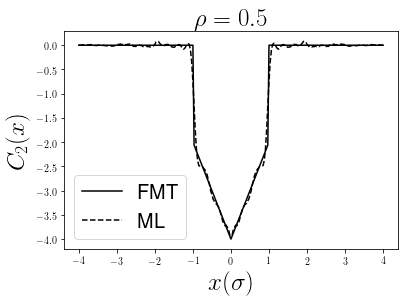

In [25]:
Lw=conv_dim
LLw = int((conv_dim-1)/2)
rho0=0.5
x = np.linspace(-LLw,LLw,Lw)*dx
plt.plot(x,cal_c2_FMT(x,rho0),"k-",label="FMT")
plt.plot(x,cal_c2_ML(rho0),"k--",label="ML")
plt.legend(fontsize=20)

plt.ylabel(r"$C_2(x)$",fontsize=25)
plt.xlabel(r"$x(\sigma)$",fontsize=25)
plt.title(r"$\rho="+str(rho0)+"$",fontsize=25)

0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3
0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3


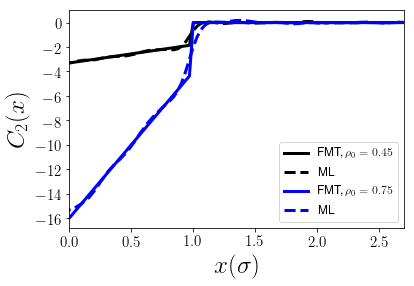

In [32]:
Lw=conv_dim
LLw = int((conv_dim-1)/2)

x = np.linspace(-LLw,LLw,Lw)*dx
plt.plot(x,cal_c2_FMT(x,0.45),"k-",lw=3,label=r"FMT,\,$\rho_0=0.45$")
plt.plot(x,cal_c2_ML(0.45),"k--",lw=3,label="ML")
plt.plot(x,cal_c2_FMT(x,0.75),"b-",lw=3,label=r"FMT,\,$\rho_0=0.75$")
plt.plot(x,cal_c2_ML(0.75),"b--",lw=3,label="ML")
plt.legend(fontsize=12,loc="best")

plt.ylabel(r"$C_2(x)$",fontsize=25)
plt.xlabel(r"$x(\sigma)$",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title(r"$\rho="+str(rho0)+"$",fontsize=25)
plt.xlim([0,2.7])    
plt.savefig("c2_hr.eps",format="eps",bbox_inches='tight')

In [27]:
np.savetxt("ML_HR_rho0_0.70.dat",np.stack((x,cal_c2_ML(0.7))))

0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3


0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3
0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3
0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3
0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3
0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3
0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3
0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3
0 0 3
0 1 3
0 2 3
1 0 3
1 1 3
1 2 3
2 0 3
2 1 3
2 2 3


(0, 2)

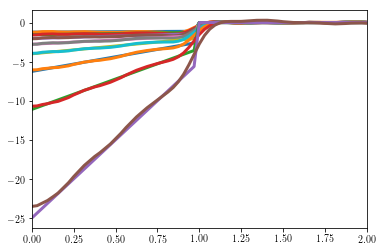

In [31]:
Lw=conv_dim
LLw = int((conv_dim-1)/2)
for i in range(1,9):
    rho0=i*0.1
    x = np.linspace(-LLw,LLw,Lw)*dx
    plt.plot(x,cal_c2_FMT(x,rho0),lw=3)
    plt.plot(x,cal_c2_ML(rho0),lw=3)
plt.xlim([0,2.7])    
